# Clustering Analysis for Survey Data

This notebook performs clustering analysis on survey data using UMAP for dimensionality reduction and K-Means for clustering. The analysis includes evaluation metrics and visualizations for both 2 and 3 cluster solutions.

## 1. Data Loading and Preprocessing

- Import required libraries
- Load survey data
- Create dummy variables
- Clean column names

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import pyreadstat
import matplotlib.pyplot as plt
import umap.umap_ as umap
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Set global plotting parameters
np.random.seed(42)
plt.rcParams['figure.figsize'] = (10, 7)
plt.rcParams['font.size'] = 12

# Load data
data = pd.read_stata("../Data/V1_qualflags_analysis2_ML.dta")
df, meta = pyreadstat.read_dta("../Data/V1_qualflags_analysis2_ML.dta")
variable_labels = dict(zip(data.columns, meta.column_labels))

# Create dummy variables and clean column names
data_dummies = pd.get_dummies(data)
new_cols = [col.replace('>', 'greater').replace('<', 'less').replace(',', '_') 
            for col in data_dummies.columns]
data_dummies.columns = new_cols

c:\Users\user\Desktop\HBS-Survey\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## 2. Dimensionality Reduction and Clustering

- Perform UMAP dimensionality reduction
- Evaluate optimal number of clusters
- Apply K-Means clustering
- Visualize results

c:\Users\user\Desktop\HBS-Survey\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\user\Desktop\HBS-Survey\.venv\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


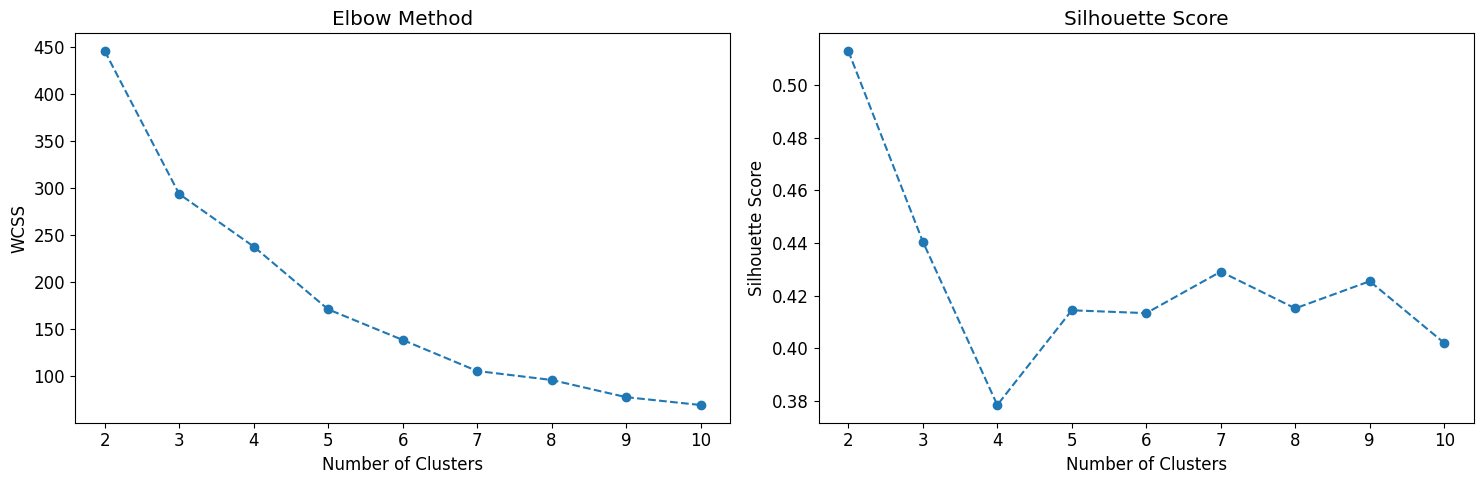

In [2]:
# Perform UMAP dimensionality reduction
reducer = umap.UMAP(random_state=42)
embedding = reducer.fit_transform(data_dummies.dropna())

# Evaluate optimal number of clusters
wcss = []
silhouette_scores = []

for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(embedding)
    wcss.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(embedding, labels))

# Plot evaluation metrics
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Elbow plot
ax1.plot(range(2, 11), wcss, marker='o', linestyle='--')
ax1.set_title('Elbow Method')
ax1.set_xlabel('Number of Clusters')
ax1.set_ylabel('WCSS')

# Silhouette plot
ax2.plot(range(2, 11), silhouette_scores, marker='o', linestyle='--')
ax2.set_title('Silhouette Score')
ax2.set_xlabel('Number of Clusters')
ax2.set_ylabel('Silhouette Score')

plt.tight_layout()
plt.show()

## 3. Cluster Analysis and Export

- Generate cluster visualizations
- Save clustering results
- Export final datasets

c:\Users\user\Desktop\HBS-Survey\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\user\Desktop\HBS-Survey\.venv\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


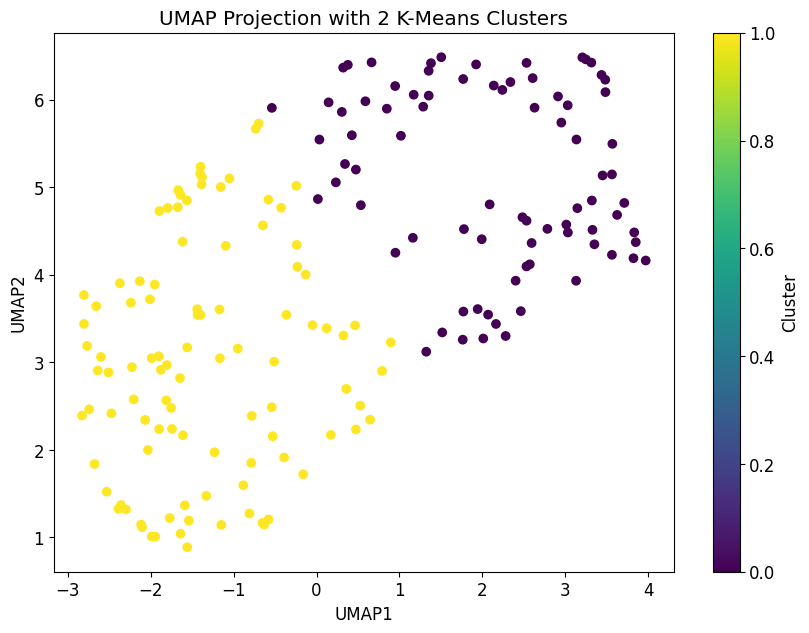


Cluster distribution for 2 clusters:
0     80
1    100
Name: count, dtype: int64


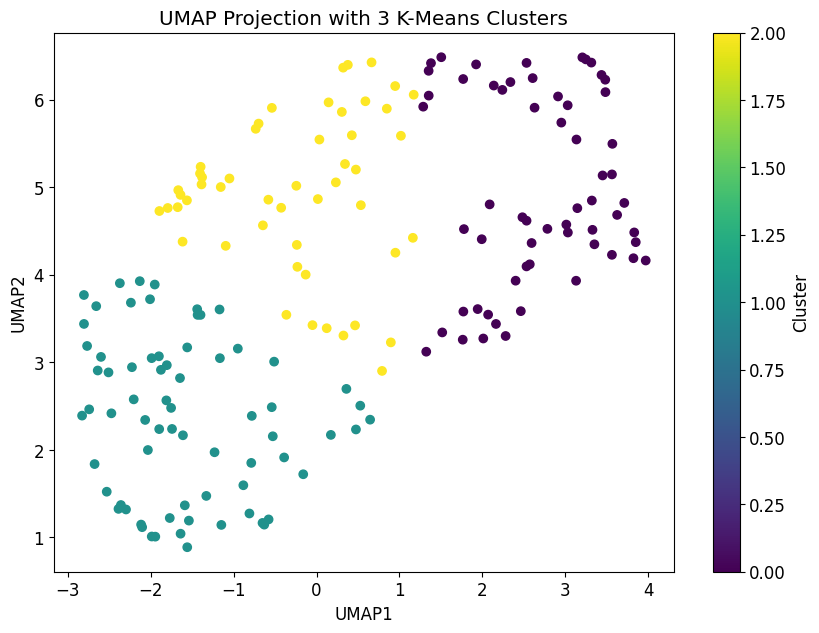


Cluster distribution for 3 clusters:
0    60
1    70
2    50
Name: count, dtype: int64


In [3]:
# Optimizar la evaluación y visualización de clusters
def perform_clustering_analysis(data_dummies, n_clusters_list=[2, 3]):
    """
    Realiza análisis de clustering completo incluyendo UMAP y K-Means/K-Medoids
    """
    # UMAP reduction
    reducer = umap.UMAP(random_state=42)
    embedding = reducer.fit_transform(data_dummies.dropna())
    
    for n_clusters in n_clusters_list:
        # K-Means clustering
        kmeans = KMeans(n_clusters=n_clusters, random_state=42)
        labels_kmeans = kmeans.fit_predict(embedding)
        
        # Visualización
        plt.figure(figsize=(10, 7))
        plt.scatter(embedding[:, 0], embedding[:, 1], c=labels_kmeans, cmap='viridis')
        plt.colorbar(label='Cluster')
        plt.title(f'UMAP Projection with {n_clusters} K-Means Clusters')
        plt.xlabel('UMAP1')
        plt.ylabel('UMAP2')
        plt.show()
        
        # Guardar resultados
        result_df = data_dummies.dropna().copy()
        result_df['KMeans_Cluster'] = labels_kmeans
        result_df.to_csv(f'clusters_{n_clusters}_construction.csv', index=False)
        
        print(f"\nCluster distribution for {n_clusters} clusters:")
        print(pd.Series(labels_kmeans).value_counts().sort_index())


perform_clustering_analysis(data_dummies)